<a href="https://colab.research.google.com/github/Celiafer/Challenge_ML_nonsupervise/blob/main/Challenge_1_2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group 2 - Team C Challenge 1



# Introduction:

Ce document contient l'ensemble de notre analyse des données du Challenge 1. Nous allons étudier lors de ce challenge les données issues du World Happiness Report. Les données fournies examinent l'état du bonheur dans le monde d'aujourd'hui et montrent comment la nouvelle science du bonheur explique les variations personnelles et nationales du bonheur. Il s'agit d'un classement de 155 pays basé sur plusieurs facteurs tels que le PIB par habitant ou une note de perception de la corruption. 


Nous importons tout d'abord l'ensemble des bibliothèques nécéssaires à l'exécution de notre code :

In [1]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn import preprocessing

Présentation des données à utiliser : 

In [2]:
happiness = pd.read_csv("happiness_2019.csv", sep=',')
happiness #affichage du tableau de valeur

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
happiness['Overall rank']=scale(happiness['Overall rank'])
happiness['Score']=scale(happiness['Score'])
happiness['GDP per capita']=scale(happiness['GDP per capita'])
happiness['Social support']=scale(happiness['Social support'])
happiness['Healthy life expectancy']=scale(happiness['Healthy life expectancy'])
happiness['Freedom to make life choices']=scale(happiness['Freedom to make life choices'])
happiness['Generosity']=scale(happiness['Generosity'])

happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.720983,Finland,2.128711,1.095042,1.268098,1.080422,1.424282,-0.335404,0.393
1,-1.698777,Denmark,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,0.410
2,-1.676571,Norway,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,0.341
3,-1.654365,Iceland,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.118
4,-1.632158,Netherlands,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,0.298
...,...,...,...,...,...,...,...,...,...
151,1.632158,Rwanda,-1.868418,-1.375303,-1.669224,-0.460929,1.137227,0.338645,0.411
152,1.654365,Tanzania,-1.961248,-1.080675,-1.085783,-0.937421,0.171040,0.960033,0.147
153,1.676571,Afghanistan,-1.986484,-1.397967,-2.319726,-1.509213,-2.748526,-0.282744,0.025
154,1.698777,Central African Republic,-2.094636,-2.213861,-4.053282,-2.569928,-1.173221,0.528221,0.035


On peut grâce à ce graphique comparer les moyennes de chaque paramètre par continent. On remarque une nette supériorité du continent océanien et une infériorité du continent africain.

On constate grâce au tableau qu'il existe de fortes disparités entre les continents. On peut remarquer par exemple que le score moyen des pays d'Océanie est plus élevé que celui des pays européens et des pays asiatiques et encore plus fortement de ceux des pays africains. De même, on remarque que le continent de résidence influe sur l'aide sociale et donc sur l'espérance de vie comme vu précédemment. 
La large domination de l'océanie est expliquée par le fait que seulement 2 pays sont référencés, qui sont très développés. 
A l'inverse, la générosité des habitants n'est pas corrélée avec leur continent d'appartenance.


#Analyse des données grâce à des diagrammes boîtes à moustache

Afin de visualiser l'étendue des différentes données présentes, nous les avons représentées dans des boîtes à moustache. Cela a été réalisé dans le but de connaitre les paramètres influants le plus sur la note finale atribuée au bonheur.

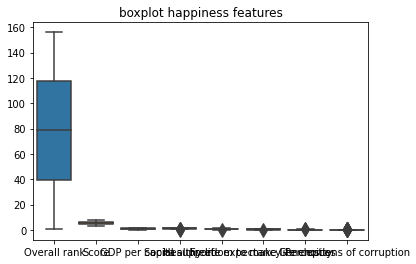

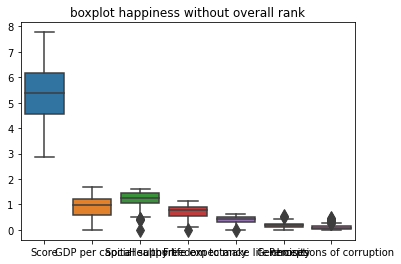

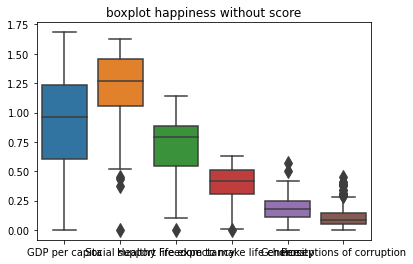

In [ ]:
# Boxplot for happiness
plt.figure()
plt.title('boxplot happiness features')
happiness_box=sns.boxplot(data=happiness,fliersize=10)   
plt.show()

# Boxplot without the first parameter to have better vision
my_happiness = happiness.drop(['Overall rank'], axis=1)
plt.figure()
plt.title('boxplot happiness without overall rank')
happiness_box1=sns.boxplot(data=my_happiness,fliersize=10)   
plt.show()

# Boxplot without the first and second parameters to have better vision
my_happiness2 = my_happiness.drop(['Score'], axis=1)
plt.figure()
plt.title('boxplot happiness without score')
happiness_box2=sns.boxplot(data=my_happiness2,fliersize=10)   
plt.show()


Grâce à cette représentation, nous pouvons voir que les paramètres "social support", "generosity" et "perception of corruption" présentent de nombreuses valeurs abérrantes. Les paramètres "Healthy life expectancy" et "freedom to make life choices" ne présentent qu'une seule valeur abérrante. Les boites représentées permettent également de voir l'étendue de donnée des différents paramètres. Nous nous concentrerons sur les 3 paramètres "GDP", "Social support" et "Healthy life expectancy" qui possèdent une large étendue de donnée. 


Nous avons ensuite regardé plus précisement les paramètres "generosity" et "perception of corruption" qui sont les paramètres avec le plus de valeures abérrantes afin de savoir s'il est pertinent de les étudier par la suite.




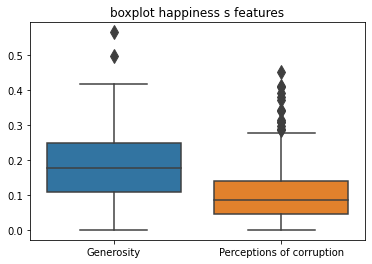

In [ ]:
plt.figure()
plt.title('boxplot happiness s features')
happiness_box=sns.boxplot(data=happiness[['Generosity','Perceptions of corruption']],fliersize=10)   
plt.show()

Nous voyons ici que le paramètre "Perceptions of corruption" a de très nombreuses valeurs abérantes. Nous pouvons donc conclure que ce paramètre n'est pas pertinent pour notre comparaison entre les différents pays.



#Analyse grâce à l'algorithme des k-means

Nous allons ici utiliser la méthode des K-means afin de savoir si les données fournies forment des cluster ou non.

Nous commençons à executer la méthode des K-means plusieurs fois pour un nombre de cluster variant entre 2 et 10. Cela nous permettra de connaitre le nombre optimal de cluster à utiliser.



In [ ]:
#We are going to compare and trace in 2D Score and GDP per capita because in the box we can see some cluster
new_happiness2 = happiness.drop(['Country or region'], axis=1) 
new_happiness3 = new_happiness2.drop(['Overall rank'], axis=1)
new_happiness4 = new_happiness3.drop(['Social support'], axis=1) 
new_happiness5 = new_happiness4.drop(['Perceptions of corruption'], axis=1) 
new_happiness6 = new_happiness5.drop(['Freedom to make life choices'], axis=1) 
new_happiness7 = new_happiness6.drop(['Generosity'], axis=1) 
new_happiness8 = new_happiness7.drop(['Healthy life expectancy'], axis=1)
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(new_happiness2) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(new_happiness2, cluster_labels)
    print("For n =", n, "Silhouette_score:", silhouette_avg)


For n = 2 Silhouette_score: 0.621639238096325
For n = 3 Silhouette_score: 0.5818370754250873
For n = 4 Silhouette_score: 0.5601579565264941
For n = 5 Silhouette_score: 0.5460788798456591
For n = 6 Silhouette_score: 0.5357005353192217
For n = 7 Silhouette_score: 0.525615106938321
For n = 8 Silhouette_score: 0.5186964374053332
For n = 9 Silhouette_score: 0.5130719667091332
For n = 10 Silhouette_score: 0.5067109505710189


Le plus haut silhouette_score a été obtenu pour un nombre de cluster n=2. Nous allons donc tracer les données avec les méthodes des k-means en utilisant  n=2 clusters. Pour visualiser ces clusters, on se focalise sur 2 paramètres (le score et le PIB par habitant) car ces deux paramètres semblent être ceux avec le plus de dispersion (d'après les diagrammes boîtes à moustache)

[[6.32166667 1.18770513]
 [4.49252564 0.62258974]]


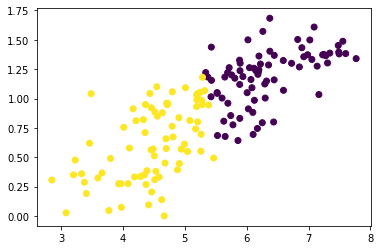

In [ ]:
kmeans = KMeans(n_clusters=2,n_init=10,init='random').fit(new_happiness8)
centers=kmeans.cluster_centers_
print(centers)
kmeans.labels_
plt.scatter(new_happiness8['Score'], new_happiness8['GDP per capita'],c=kmeans.labels_)

On observe que cette méthode n'est pas très efficace, il ne se distingue pas de clusters nets. On conclut que cette technique n'est pas efficace pour analyser ce jeu de données et on va par la suite se tourner vers un clustering hiérarchique et un ACP.

# Méthode de clustering hiérarchique



Afin de débuter cette étude nous avons tout d'abord étudié différentes mesures, méthodes et pdists afin de séléctionner les plus efficaces.

In [ ]:
my_happiness = happiness.drop(['Country or region'], axis=1)
happiness_scaled=pd.DataFrame(scale(my_happiness),columns=my_happiness.columns,index=my_happiness.index) 

In [ ]:
# we highlight the impact of the chosen distance and of the agglomerative criteria on the results

metrics=['euclidean','hamming', 'cityblock' , 'cosine'] # metrics used for linkage 
methods=['single','complete','average','weighted'] # methods used for linkage
pdists=['euclidean','minkowski','cityblock','cosine']  # metrics used for pdist()
max_val=0
best_metric=None
best_method=None
best_p_dist=None
Z1=linkage(happiness_scaled,'ward') # we try the method ward
c1, coph_dists = cophenet(Z1, pdist(happiness_scaled))
print('(','ward',',','euclidean',',','euclidean',') :',c1)

Z2=linkage(happiness_scaled,'centroid') #we try the method centroid 
c2, coph_dists = cophenet(Z2, pdist(happiness_scaled))
print('(','centroid',',','euclidean',',','euclidean',') :',c2)

Z3=linkage(happiness_scaled,'median') #we try the method median
c3, coph_dists = cophenet(Z3, pdist(happiness_scaled))
print('(','median',',','euclidean',',','euclidean',') :',c3)




for metric1 in metrics:
    for method1 in methods:
        for pdist1 in pdists:
            Z=linkage(happiness_scaled,method1,metric=metric1)
            c, coph_dists = cophenet(Z, pdist(happiness_scaled,pdist1))
            if (c>max_val):
                max_val=c
                best_metric=metric1
                best_method=method1
                best_p_dist=pdist1
            if (c1>max_val):
                max_val=c1
                best_metric='euclidean'
                best_method='ward'
                best_p_dist='euclidean'    
            if (c2>max_val):
                max_val=c2
                best_metric='euclidean'
                best_method='centroid'
                best_p_dist='euclidean' 
            if (c3>max_val):
                max_val=c3
                best_metric='euclidean'
                best_method='median'
                best_p_dist='euclidean' 
            else:
                max_val=max_val
            #print('(',method1,',',metric1,',',pdist1,') :',c)
print('the best cophenet index is about :',max_val,'which corresponds to the triple: (method=',best_method,',metric=',best_metric,'and pdist=',best_p_dist,')')

( ward , euclidean , euclidean ) : 0.6266499438989581
( centroid , euclidean , euclidean ) : 0.707501186992345
( median , euclidean , euclidean ) : 0.566571435426363
the best cophenet index is about : 0.7826749132808359 which corresponds to the triple: (method= average ,metric= cosine and pdist= cosine )


La meilleure méthode que nous pouvons utiliser est la méthode "average". Nous utiliserons également par la suite la mesure "cosine" et le pdist "cosine".

Nous allons alors à nouveau déterminer le nombre de cluster optimal pour notre étude.


In [ ]:
new_happiness = happiness.drop(['Country or region'], axis = 1)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,20]
Silhouette_1 = []
N=[]
for n in range_n_clusters:
    kmeans_happiness = KMeans(n_clusters=n, n_init=10).fit(new_happiness) # Clustering with the given number of clusters
    cluster_labels = kmeans_happiness.labels_ # Extract the labels
    silhouette_avg = silhouette_score(new_happiness, cluster_labels) # Corresponding silhouette score
    Silhouette_1.append(silhouette_avg)
    N.append(n)
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6217451202492066
For n = 3 Silhouette_score: 0.5820640881933623
For n = 4 Silhouette_score: 0.5601610003571944
For n = 5 Silhouette_score: 0.5459134447900619
For n = 6 Silhouette_score: 0.5356322555499053
For n = 7 Silhouette_score: 0.5257037078148624
For n = 8 Silhouette_score: 0.5178094129935682
For n = 9 Silhouette_score: 0.5123027911212741
For n = 10 Silhouette_score: 0.5062781621865772
For n = 11 Silhouette_score: 0.5013700473226512
For n = 12 Silhouette_score: 0.49448554161576497
For n = 13 Silhouette_score: 0.4899967514891429
For n = 14 Silhouette_score: 0.4879158934178393
For n = 15 Silhouette_score: 0.4817615566117709
For n = 20 Silhouette_score: 0.4566145915733489


On remarque que le nombre de cluster optimal à utiliser est 2 et que l'indice décroit en fonction de n comme le montre la figure suivante :


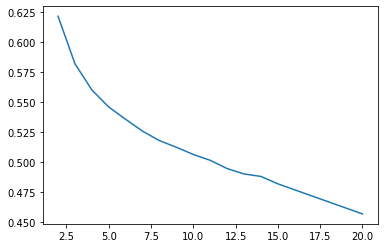

In [ ]:
plt.figure()
plt.plot(N,Silhouette_1)

Ainsi, on peut voir que l'indice décroit relativement rapidement au début et que 2 clusters paraît une solution appropriée, comme déterminé précedemment par la méthode de k-means.
On peut émettre la supposition que ces deux clusters sont les pays du Nord et les pays du Sud (économiquement parlant). 

Nous allons à présent afficher le dendrogramme qui nous permettra de visualiser les clusters.



In [ ]:
happiness_scaled=pd.DataFrame((scale(new_happiness)),columns=new_happiness.columns,index=new_happiness.index)
A = linkage(happiness_scaled,'ward')
B = linkage(happiness_scaled, 'average', 'cosine')
#print(A)
#print (B)

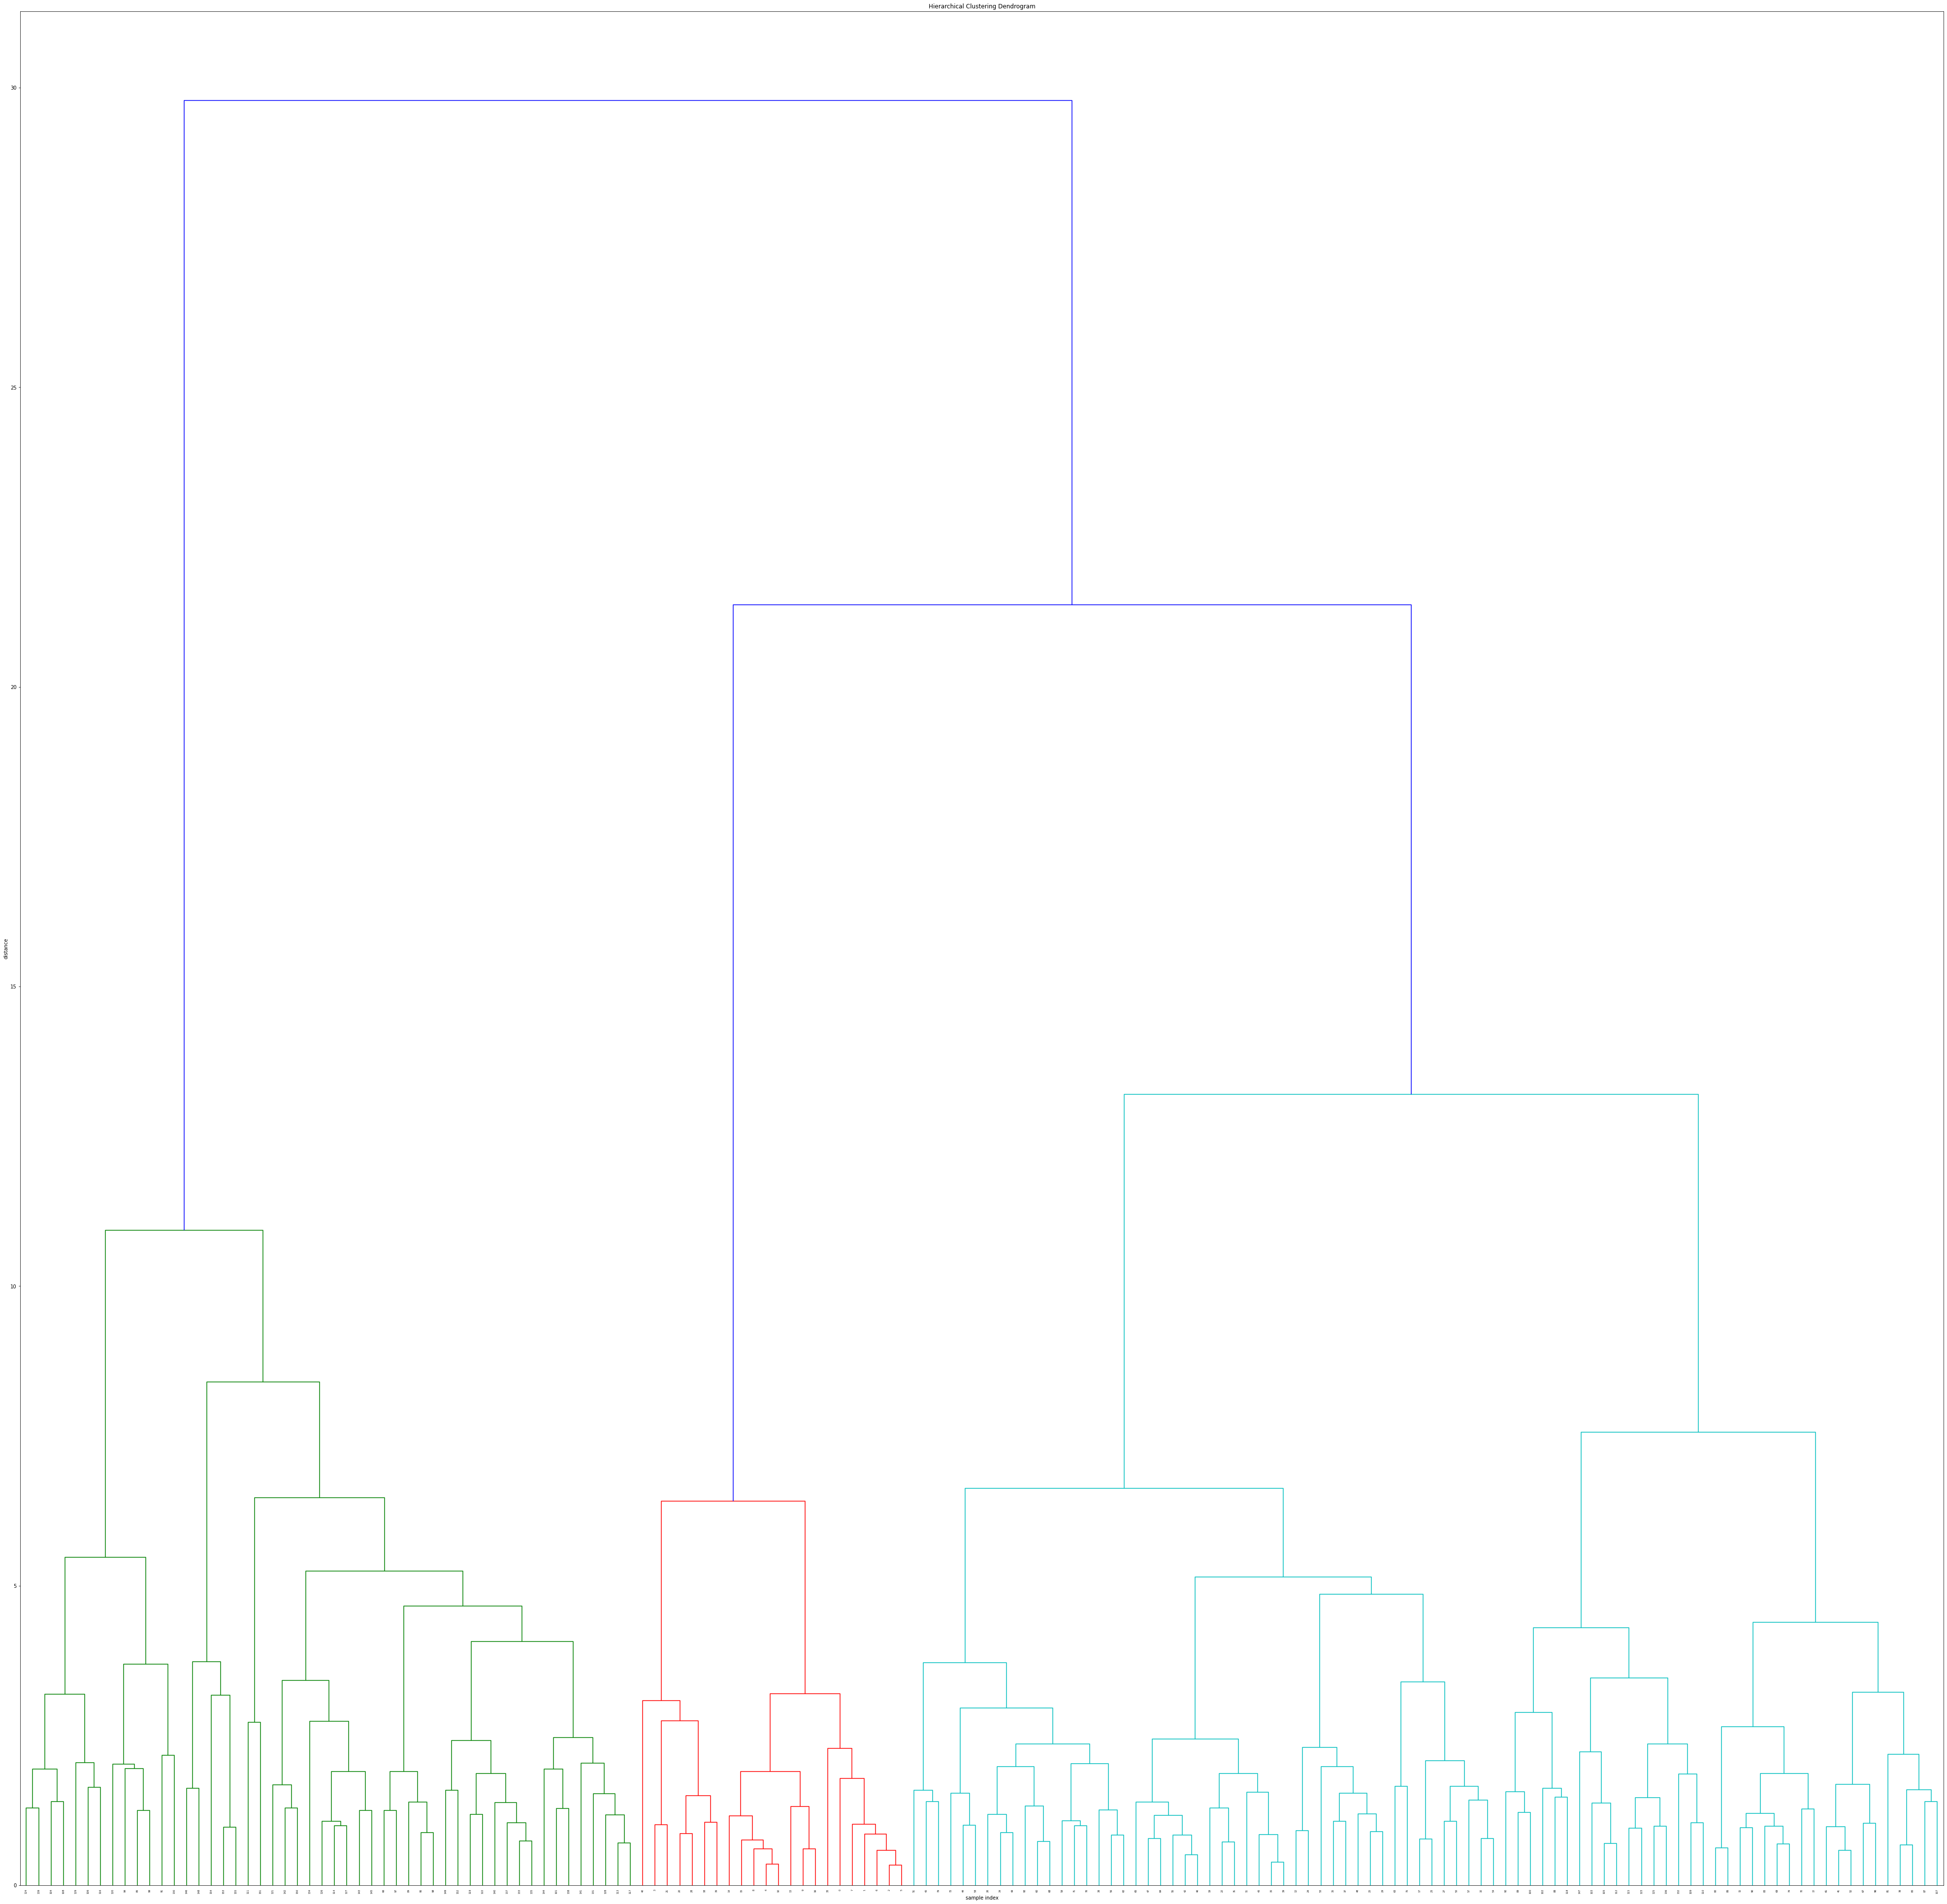

In [ ]:
plt.figure(figsize=(70, 70))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
C=dendrogram(A)
plt.show()

L'axe des abscisses est composé d'un "grand" nombre d'indice, donc même en 70 x 70, on ne parvient pas à lire le dendogramme.


On peut voir que le dendrogramme semble nous apporter 3 clusters alors que lorsque nous avons comparé les silhouette_score il semblait n'y en avoir que 2 puisque le score était plus élevé. On va alors couper le dendogramme pour essayer de mettre en lumière cela.

In [ ]:
groupes_decoupe = fcluster(A,t=20,criterion='distance')
print(groupes_decoupe)


[2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3 2 3 3 2
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 1 3 3 1 1 3 1 1 1 3 1 3 3 1 3 1 3 1 3 3
 1 3 1 1 3 1 1 3 1 1 1 1 3 1 3 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1]


Le tableau précédent est un vecteur qui contient les emplacements dans les clusters des 156 pays présents dans les données. On a coupé le dendrogramme horizontalement à une ordonnée t=20 qui n'est ni trop basse ni trop haute, d'après le dendogramme, afin de faire apparaître ces 3 groupes présents dans le vecteur précédent. Chaque numéro groupes_decoupe[i] correspond à l'emplacement dans le cluster pour la donnée i.
On peut donc voir que l'étude précédente nous donne un résultat que la méthode ne prédisait pas, on va donc passer à la méthiode de l'ACP pour essayer d'obtenir des résultats plus probants.


#Méthode de l'ACP



In [ ]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

Cette fonction plot_corr, récupérée du Lab2, va nous permettre d'établir la corrélation entre les différents paramètres. 

In [ ]:
data = pd.read_csv("happiness_test.csv", sep=' ')

In [ ]:
data2 = data.drop(['Country_or_region'], axis = 1)

"data2" nous permet de n'avoir que des données, définies par des numéros et non plus des noms

In [ ]:
indicateur = data2.columns[:8]


Index(['Overall_rank', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [ ]:
corr = data2.corr()

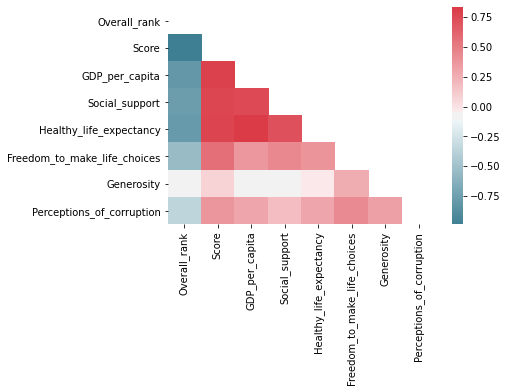

In [ ]:
plot_corr(corr)

On remarque que les couples (score, PIB par habitant), (social support, score),(social support, PIB par habitant), etc sont fortement corellés ce qui est logique et sera expliquer avec les analyses que nous feront dans la suite de cette étude.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data2.values

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [ ]:
np.mean(X, axis=0), np.var(X, axis=0)

(array([78.5       ,  5.40709615,  0.90514744,  1.2088141 ,  0.72524359,
         0.39257051,  0.18484615,  0.11060256]),
 array([2.02791667e+03, 1.23109330e+00, 1.57696767e-01, 8.89416770e-02,
        5.82482355e-02, 2.04002578e-02, 9.01524556e-03, 8.88011128e-03]))

In [ ]:
np.mean(X_scaled, axis=0), np.var(X_scaled, axis=0)

(array([-9.10952225e-17,  9.10952225e-17, -1.82190445e-16, -9.10952225e-17,
        -2.73285668e-16, -2.73285668e-16,  2.20621242e-16, -9.10952225e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(X_scaled[:,:8])

In [ ]:
X_proj = pca.transform(X_scaled[:,:8])
X_proj

array([[-4.10683445,  1.13502047,  1.89790492, ...,  0.53616178,
        -0.21774257, -0.22299145],
       [-4.14154487,  1.92679036,  1.47120549, ...,  0.51686521,
        -0.10097569, -0.11795312],
       [-4.16245045,  1.63169907,  0.80905207, ...,  0.25301552,
         0.08630976, -0.12701614],
       ...,
       [ 4.70352329, -0.63564612,  0.37083124, ..., -0.36653256,
         0.15539033,  0.16942512],
       [ 5.68616394,  1.23225406,  0.15365249, ..., -1.44848566,
         0.56054266,  0.21328616],
       [ 4.75580926,  0.11631248,  0.60108506, ...,  0.09606818,
         0.19538925,  0.40121914]])



> On va chercher à déterminer les composantes principales



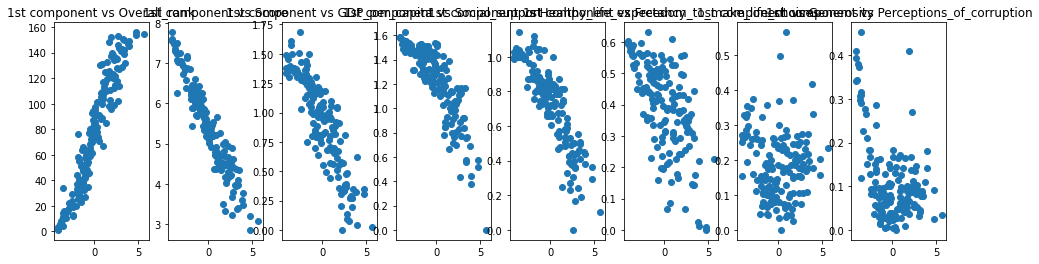

In [ ]:
_, axes = plt.subplots(ncols=8, figsize=(16,4))
for i, (ax, col) in enumerate(zip(axes, ['Overall_rank', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'])):
    ax.scatter(X_proj[:,0], data[col])
    ax.set_title(f'1st component vs {col}')

Pour la première composante, on remarque qu'elle est fortement corrélée avec le rang général, et négativement corrélée avec 4 autres composantes. 


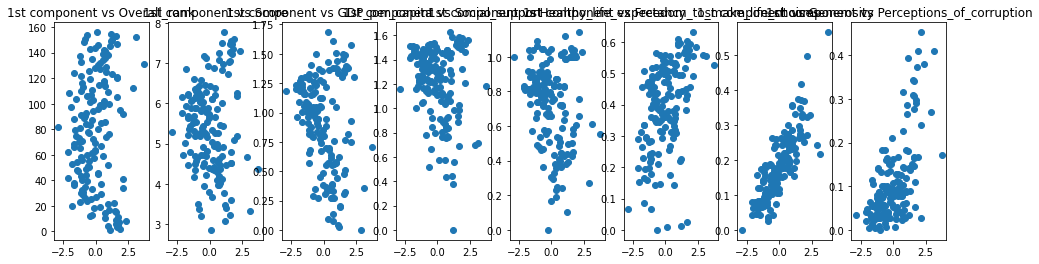

In [ ]:
_, axes = plt.subplots(ncols=8, figsize=(16,4))
for i, (ax, col) in enumerate(zip(axes, ['Overall_rank', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'])):
    ax.scatter(X_proj[:,1], data[col])
    ax.set_title(f'1st component vs {col}')

Quant à la deuxième composante principale, elle est fortement corrélée (positivement) à la générosité. 

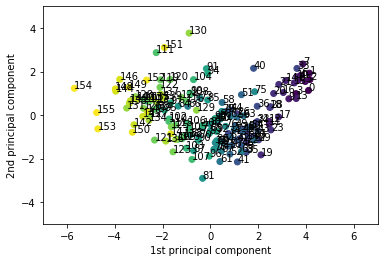

In [ ]:
plt.scatter(X_proj[:,0], X_proj[:,1], c =data['Overall_rank'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.xlim(-7, 7)
plt.ylim(-5, 5)

for i in range(X_proj.shape[0]):
    plt.text(X_proj[i,0], X_proj[i,1], data2.index[i])

La deuxième composante est liée à la générosité. Pour s'en assurer, on peut regarder les cas les plus éloignés : le 81 (qui correspond au pays 82 car le premier pays est noté 0) est la Grèce. Or, la générosité de la Grèce est à 0, ce qui confirme son point le plus bas sur l'échelle des ordonnées. Pareil pour le Myanmar qui possède la générosité la plus haute, et qui est en haut de notre schéma. (générosité mise à 0, supposemment par manque de données)

Quant à la première, elle est fortement corrélée aux 5 premiers facteurs (mais positivement qu'au 1er), et aussi au 6ème, ce qui peut nous indiqué que certains facteurs peuvent être redondants. 

Logiquement, les pays les plus en haut à gauche sont les pays les plus généreux et les plus bas au classement. De cette manière, on n'identifie pas de cluster spécial

In [ ]:
components = pca.components_

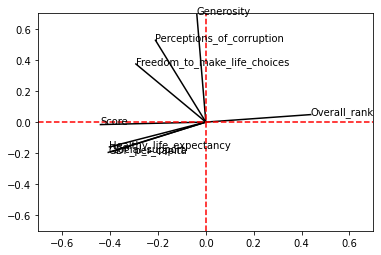

In [ ]:
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data2.columns[i])

plt.plot([-0.7, 0.7], [0, 0], color='red', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='red', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);

On constate une corrélation opposée (-1) entre l'overall rank et le score du pays. En effet, plus un pays a un score élevé plus il est bien classé (et donc un classement plus faible).
On voit également que social support et générosity forment un angle à 90 degrés, on en déduit que ces paramètres sont linéairement indépendants (ce qui semble cohérent : les actions sociales d'un gouvernement n'influent pas sur la générosité des habitants). De la même manière, le rang global et la générosité sont linéairement indépendantes, ce qui confirme notre choix de vecteurs propres. 

On remarque aussi une corrélation d'environ 1 entre l'aide social et l'espérance de vie dans un pays. Cela s'explique par de meilleurs soins apportés aux habitants ce qui augmente leur espérance de vie.



> On va désormais appliquer la méthode d'APC utilisant la matrice de covariance pour vérifier nos résultats précédents.



In [ ]:
X_cov = np.dot(X_scaled[:,:12].T, X_scaled[:,:12]) / X_scaled.shape[0]

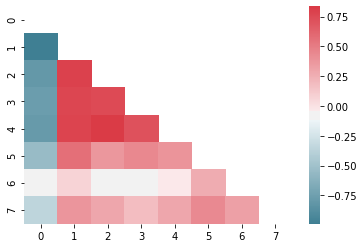

In [ ]:
plot_corr(X_cov)

L'analyse de ce graphique est la même que faite précedemment.

In [ ]:
eigvals, eigvecs = np.linalg.eigh(X_cov)

In [ ]:
components = eigvecs[:,np.argsort(eigvals)[::-1]]

In [ ]:
components

array([[-4.38353116e-01,  4.81958067e-02,  8.09304510e-02,
         1.80368320e-03, -5.52021508e-01,  8.84729120e-02,
        -1.65027674e-02,  6.97239684e-01],
       [ 4.40803667e-01, -1.61571864e-02, -7.27477265e-02,
        -7.99297749e-03,  5.35814601e-01, -2.44819984e-02,
         3.61397195e-02,  7.14893152e-01],
       [ 4.07932698e-01, -1.95147533e-01,  7.76311362e-02,
         2.43462032e-01, -3.06498966e-01, -1.54042504e-01,
        -7.82424661e-01,  1.86799549e-02],
       [ 3.91512011e-01, -1.89859483e-01, -2.27588208e-01,
        -5.80922533e-02, -2.84077249e-01,  8.04292707e-01,
         1.62862600e-01, -3.72793586e-02],
       [ 4.03033612e-01, -1.59771615e-01,  2.82085539e-02,
         2.78434425e-01, -4.06109725e-01, -4.68351012e-01,
         5.91004032e-01,  1.23264652e-02],
       [ 2.92578950e-01,  3.74148890e-01, -9.03027765e-02,
        -8.07294464e-01, -2.53828884e-01, -2.15845365e-01,
        -5.91119494e-02, -4.32162930e-03],
       [ 3.76707587e-02,  6.929371

In [ ]:
X_proj = np.dot(X_scaled[:,:12], components)

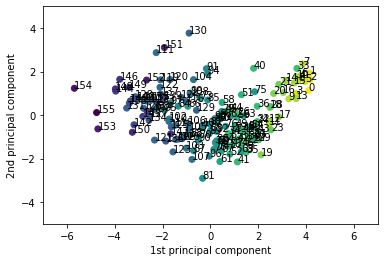

In [ ]:
plt.scatter(X_proj[:,0], X_proj[:,1], c=data['Score'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.xlim(-7, 7)
plt.ylim(-5, 5)

for i in range(X_proj.shape[0]):
    plt.text(X_proj[i,0], X_proj[i,1], data.index[i])

On obtient ainsi le même résultat qu'avec l'ancienne méthode, ce qui confirme la véracité des résultats

# Conclusion

Pour conclure, l'étude de ces données a permis de mettre en lumière de nombreux liens entre les pays et leurs données, mais aussi entre les données elles-même. On a pu voir que la méthode des K-Means appliquée aux données identifiées dans les boîtes à moustache n'a pas été très efficace dans l'étude de ces données et les silouhettes n'ont donc pas été efficace pour l'identification des clusters comme on a pu le voir avec le tracé du dendrogramme qui nous donne 3 clusters ( au lieu de 2 théoriquement). Ainsi, nous nous sommes tourné vers la méthode de l'ACP pour affiner notre étude et avoir des résultats plus pertinents. Après avoir rajouté une colonne continent pour pouvoir comparé les données par continent, nous avons déterminer les première et deuxième composantes ainsi que les différentes corrélations entre les données ce qui nous a permis d'avoir des figures nous donnant plus d'informations et de mieux expliquer ces données.